In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats

import requests
import json

# Import the API key
from config import geoapify_key


In [2]:
# Read saved data
Skills_List_db = pd.read_csv("Resources/Skills_Priority_List_2022.csv")

# Display sample data
Skills_List_db.head()

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,111111,Chief Executive or Managing Director,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
1,111211,Corporate General Manager,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
2,121111,Aquaculture Farmer,NS,Moderate,NS,NS,S,NS,NS,NS,S,NS
3,121311,Apiarist,S,Moderate,S,S,S,S,NS,S,S,S
4,121312,Beef Cattle Farmer,NS,Soft,R,NS,S,NS,NS,NS,S,NS


In [3]:
Shortage = Skills_List_db["Current National Labour Market Rating"].value_counts()

NS    628
S     278
R       8
Name: Current National Labour Market Rating, dtype: int64

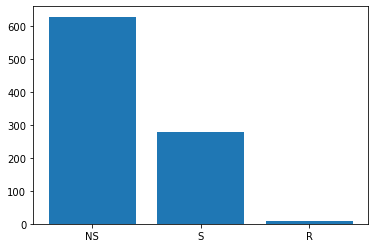

In [4]:
x_axis= Shortage.index

y_axis = Shortage.values

plt.bar(x_axis, y_axis, align="center")

Shortage

In [5]:
Future_Demand = Skills_List_db["National Future Demand Rating"].value_counts()

Moderate    572
Strong      234
Soft        108
Name: National Future Demand Rating, dtype: int64

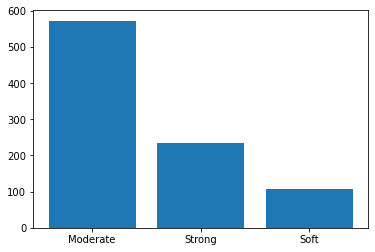

In [6]:
x_axis= Future_Demand.index

y_axis = Future_Demand.values

plt.bar(x_axis, y_axis, align="center")

Future_Demand

In [7]:
NSW_data = Skills_List_db.loc[(Skills_List_db["Current National Labour Market Rating"]=="S") & (Skills_List_db["National Future Demand Rating"]=="Strong")& (Skills_List_db["NSW"]=="S"),:]

In [8]:
NSW_data

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
35,132511,Research and Development Manager,S,Strong,S,S,S,S,S,S,S,S
63,139914,Quality Assurance Manager,S,Strong,S,S,S,S,S,S,S,S
211,233212,Geotechnical Engineer,S,Strong,S,S,S,S,S,S,S,S
220,233611,Mining Engineer (excluding Petroleum),S,Strong,S,S,S,S,S,S,S,S
221,233612,Petroleum Engineer,S,Strong,S,S,S,S,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
829,712211,Driller,S,Strong,S,S,S,S,S,S,S,S
830,712212,Miner,S,Strong,S,S,S,S,S,S,S,S
878,821412,Home Improvement Installer,S,Strong,S,S,S,S,NS,S,S,S
885,831211,Meat Boner and Slicer,S,Strong,S,S,S,S,NS,S,S,S


In [9]:
# Read saved data
Glassdoor_db = pd.read_csv("Resources/glassdoor_reviews.csv")

# Display sample data
Glassdoor_db.head()



,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [10]:
# Display sample data
Glassdoor_db.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [11]:
Locs = Glassdoor_db.location.value_counts()

In [12]:
Locs.to_csv("Output_data/Locations.csv")

In [ ]:
# Glassdoor_db_Aus = Glassdoor_db.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)

In [ ]:
# Glassdoor_db_Aus = Glassdoor_db.location.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)


In [ ]:
# Glassdoor_db_Aus.value_counts()

In [14]:
Glassdoor_db.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [26]:
Data= Glassdoor_db.loc[Glassdoor_db.location.str.contains(r"australia|victoria|tasmania|new south wales|northern territory", case=False) == True,:]

In [27]:
Data.head()


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
5265,ASDA,2021-02-04,Technician,"Current Employee, less than 1 year","Perth, Western Australia, Western Australia",4,5.0,5.0,5.0,5.0,5.0,5.0,o,x,o,happy place,"bad furniture, great food. amazing people","hard days, lots of work"
9608,Accor,2016-04-23,GSA,Current Employee,"Perth, Western Australia, Western Australia",2,3.0,4.0,NaN,2.0,2.0,3.0,x,o,x,GSA Multiple hotels,"Global chain, easy relocation opportunities. s...",Every hotel its its own kingdom run differentl...
9920,Accor,2019-07-25,Reception,"Former Employee, more than 3 years","Perth, Western Australia, Western Australia",1,1.0,1.0,NaN,1.0,1.0,1.0,o,o,o,stay away,none- really bad\r\nworse place i have ever wo...,poor management\r\npassive aggressive manageme...
10010,Accor,2020-04-15,Regional Technical Manager,Current Employee,"Perth, Western Australia, Western Australia",4,4.0,4.0,NaN,4.0,4.0,4.0,v,v,r,Good,international hotel company widely recognize,"As a large multinational companies, local appr..."
10127,Accor,2020-11-09,Anonymous Employee,"Former Employee, more than 8 years","Perth, Western Australia, Western Australia",4,3.0,4.0,5.0,4.0,3.0,4.0,v,v,v,Hotel company,"Great place to work, company looks after its p...",Systems can be an issue


In [28]:
Data.to_csv("Output_data/Glassdoor_Aus_Data.csv")

In [29]:
Locs_filtered = Data.location.value_counts()

Locs_filtered.to_csv("Output_data/Locations_Filtered.csv")

In [35]:
Locs_filtered

Perth, Western Australia, Western Australia    452
Victoria, BC                                    96
Victoria, England, England                      37
Victoria                                         7
Victoria, TX                                     5
                                              ... 
St Peters, New South Wales                       1
Kilburn, South Australia                         1
Croydon, New South Wales, New South Wales        1
Glebe, New South Wales                           1
Lyndhurst, Victoria, Victoria                    1
Name: location, Length: 103, dtype: int64

In [39]:
# Set the search parameters
target_city = "Perth, Western Australia, Western Australia"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

In [40]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                115.7005801,
                -32.1158964,
                116.0205801,
                -31.7958964
            ],
            "geometry": {
                "coordinates": [
                    115.8605801,
                    -31.9558964
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Perth",
                "address_line2": "Perth WA 6000, Australia",
                "category": "populated_place",
                "city": "Perth",
                "country": "Australia",
                "country_code": "au",
                "county": "City of Perth",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyright"
                

In [46]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]
country = response["features"][0]["properties"]["country"]
city = response["features"][0]["properties"]["city"]

# Print results
print(f"{city}, {country}: {lat}, {lon}")

Perth, Australia: -31.9558964, 115.8605801


In [48]:
cities = Locs_filtered.index

In [49]:

# Define an empty list to fetch data for each city
city_data = []

for city in cities:
    target_city = city
    params = {
    "text": target_city,
    "apiKey": geoapify_key}
    # Build URL using the geocode endpoint
    base_url = "https://api.geoapify.com/v1/geocode/search"
    
    try: 
        # Run request
        response = requests.get(base_url, params=params).json()
        # Extract lat/lon
        lat = response["features"][0]["properties"]["lat"]
        lon = response["features"][0]["properties"]["lon"]
        country = response["features"][0]["properties"]["country"]
        city_r = response["features"][0]["properties"]["city"]
        # Print results
        print(f"{city_r}, {country}: {lat}, {lon}")

        city_data.append({"City": city_r,
                          "country": country,
                          "Latitude": lat,
                          "Longitude": lon,
                          "Location":  city
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Perth, Australia: -31.9558964, 115.8605801
Victoria, Canada: 48.4283182, -123.3649533
City of Westminster, United Kingdom: 51.4959786, -0.1413172
Victoria, Seychelles: -4.6232085, 55.452359
Victoria, United States: 28.8202926, -96.9848646
Griffith, Australia: -34.2864069, 146.04243190668797
Sydney, Australia: -34.0636914, 150.8206159
Sydney, Australia: -33.7478359, 151.0350621
Sydney, Australia: -33.8260081, 151.2254326
Ciudad Victoria, Mexico: 23.7389846, -99.1441352
Melbourne, Australia: -37.7136622, 145.14771859225922
Sydney, Australia: -33.8784753, 151.104049
City not found. Skipping...
Ciudad Victoria, Mexico: 23.7389846, -99.1441352
Ciudad Victoria, Mexico: 23.7389846, -99.1441352
Perth, Australia: -41.5730227, 147.1719755
Mount Barker, Australia: -35.0641302, 138.8586385
Sydney, Australia: -33.9332633, 150.949686
Melbourne, Australia: -37.8255813, 145.28219
Ciudad Victoria, Mexico: 23.7389846, -99.1441352
City Of Kalamunda, Australia: -31.9434617, 116.0056139
Sydney, Australia: 

In [50]:
city_data

[{'City': 'Perth',
  'country': 'Australia',
  'Latitude': -31.9558964,
  'Longitude': 115.8605801,
  'Location': 'Perth, Western Australia, Western Australia'},
 {'City': 'Victoria',
  'country': 'Canada',
  'Latitude': 48.4283182,
  'Longitude': -123.3649533,
  'Location': 'Victoria, BC'},
 {'City': 'City of Westminster',
  'country': 'United Kingdom',
  'Latitude': 51.4959786,
  'Longitude': -0.1413172,
  'Location': 'Victoria, England, England'},
 {'City': 'Victoria',
  'country': 'Seychelles',
  'Latitude': -4.6232085,
  'Longitude': 55.452359,
  'Location': 'Victoria'},
 {'City': 'Victoria',
  'country': 'United States',
  'Latitude': 28.8202926,
  'Longitude': -96.9848646,
  'Location': 'Victoria, TX'},
 {'City': 'Griffith',
  'country': 'Australia',
  'Latitude': -34.2864069,
  'Longitude': 146.04243190668797,
  'Location': 'Olympic Park, New South Wales'},
 {'City': 'Sydney',
  'country': 'Australia',
  'Latitude': -34.0636914,
  'Longitude': 150.8206159,
  'Location': 'Campbe

In [51]:
Data.head(20)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
5265,ASDA,2021-02-04,Technician,"Current Employee, less than 1 year","Perth, Western Australia, Western Australia",4,5.0,5.0,5.0,5.0,5.0,5.0,o,x,o,happy place,"bad furniture, great food. amazing people","hard days, lots of work"
9608,Accor,2016-04-23,GSA,Current Employee,"Perth, Western Australia, Western Australia",2,3.0,4.0,NaN,2.0,2.0,3.0,x,o,x,GSA Multiple hotels,"Global chain, easy relocation opportunities. s...",Every hotel its its own kingdom run differentl...
9920,Accor,2019-07-25,Reception,"Former Employee, more than 3 years","Perth, Western Australia, Western Australia",1,1.0,1.0,NaN,1.0,1.0,1.0,o,o,o,stay away,none- really bad\r\nworse place i have ever wo...,poor management\r\npassive aggressive manageme...
10010,Accor,2020-04-15,Regional Technical Manager,Current Employee,"Perth, Western Australia, Western Australia",4,4.0,4.0,NaN,4.0,4.0,4.0,v,v,r,Good,international hotel company widely recognize,"As a large multinational companies, local appr..."
10127,Accor,2020-11-09,Anonymous Employee,"Former Employee, more than 8 years","Perth, Western Australia, Western Australia",4,3.0,4.0,5.0,4.0,3.0,4.0,v,v,v,Hotel company,"Great place to work, company looks after its p...",Systems can be an issue
10187,Accor,2021-01-17,Reservations Agent,"Former Employee, more than 3 years","Perth, Western Australia, Western Australia",1,1.0,1.0,1.0,1.0,1.0,1.0,x,x,x,Worst ever- do not go here,There are actually no pros,Many cons- incompetent management- poor workin...
10222,Accor,2021-02-19,Night Manager,Current Employee,"Perth, Western Australia, Western Australia",5,4.0,4.0,5.0,5.0,2.0,4.0,v,v,r,Good Company,"Loyal, support development, ethical company",Industry as a whole is low paid
11864,Adecco,2017-04-07,Barista,"Former Employee, less than 1 year","Perth, Western Australia, Western Australia",5,5.0,4.0,NaN,3.0,4.0,4.0,v,r,v,"Very friendly staff, had a great time working ...",I had to submit employment paperwork from Adec...,I don't remember having any problems.
13148,Adecco,2020-12-24,Process Worker,"Current Employee, more than 3 years","Dandenong South, Victoria",5,5.0,4.0,4.0,4.0,NaN,NaN,v,o,o,Factory hand wages,Great consultants to work with,None that I have encountered so far
13386,Adecco,2021-05-20,Data Entry Operator,"Former Employee, less than 1 year","Rosehill, New South Wales, New South Wales",5,2.0,5.0,4.0,2.0,1.0,4.0,v,v,v,Addeco Data Entry,The environment was chill and supervisors are ...,Its data entry so its tedious work


In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City         96
country      96
Latitude     96
Longitude    96
Location     96
dtype: int64

In [53]:
city_data_df

,City,country,Latitude,Longitude,Location
0,Perth,Australia,-31.955896,115.860580,"Perth, Western Australia, Western Australia"
1,Victoria,Canada,48.428318,-123.364953,"Victoria, BC"
2,City of Westminster,United Kingdom,51.495979,-0.141317,"Victoria, England, England"
3,Victoria,Seychelles,-4.623208,55.452359,Victoria
4,Victoria,United States,28.820293,-96.984865,"Victoria, TX"
...,...,...,...,...,...
91,Sydney,Australia,-33.915947,151.176332,"St Peters, New South Wales"
92,Adelaide,Australia,-34.859690,138.585586,"Kilburn, South Australia"
93,Sydney,Australia,-33.877794,151.115650,"Croydon, New South Wales, New South Wales"
94,Sydney,Australia,-33.877778,151.186238,"Glebe, New South Wales"
